# Importing Libs

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

# Importing Unscaled Dataset

In [7]:
path=r"C:\Users\Sam\Desktop\CF\Machine Learning\Part 1\ClimateWins\DataSets\Dataset-weather-prediction-dataset-processed.csv"

In [8]:
d=pd.read_csv(os.path.join(path))

In [9]:
# checking for execution
d.head(1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9


# limiting the set to year 1970

In [12]:
d1999=d[d['DATE'].astype(str).str.contains("1999")] 
d1999

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14245,19990101,1,6,2.1,0.92,1.0156,0.33,0.00,0,0.2,...,7,0.88,0.9856,0.14,2.05,0,0.0,7.9,5.5,10.4
14246,19990102,1,5,2.1,0.81,1.0142,0.54,0.20,0,2.6,...,6,0.71,0.9890,0.24,0.86,0,0.7,7.9,5.4,9.1
14247,19990103,1,7,2.1,0.69,1.0147,0.27,0.04,0,0.6,...,7,0.84,0.9930,0.13,1.64,0,0.0,9.1,5.6,12.7
14248,19990104,1,7,2.1,0.77,1.0213,0.18,0.00,0,0.0,...,7,0.72,0.9978,0.16,0.90,0,0.0,10.0,7.3,11.6
14249,19990105,1,5,2.1,0.80,1.0229,0.58,0.00,0,6.1,...,8,0.86,0.9976,0.17,0.00,0,0.0,8.6,6.4,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,19991227,12,7,2.1,0.74,0.9953,0.28,1.93,0,1.0,...,7,0.75,0.9954,0.15,0.41,0,0.1,4.8,3.0,7.5
14606,19991228,12,8,2.1,0.88,0.9956,0.13,1.22,0,0.0,...,3,0.73,1.0102,0.41,0.03,0,5.1,5.3,2.5,8.1
14607,19991229,12,8,2.1,0.84,1.0162,0.21,0.11,1,0.1,...,5,0.81,1.0229,0.35,0.85,0,3.9,7.1,4.2,9.1
14608,19991230,12,7,2.1,0.80,1.0276,0.26,0.01,0,0.5,...,8,0.94,1.0171,0.14,0.27,0,0.0,8.4,5.5,11.2


In [13]:
# importing data again to be able to execute the code
data=pd.read_csv(os.path.join(path))

In [14]:
data

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [15]:
d1999=data[data['DATE'].astype(str).str.contains("1999")] 
d1999

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14245,19990101,1,6,2.1,0.92,1.0156,0.33,0.00,0,0.2,...,7,0.88,0.9856,0.14,2.05,0,0.0,7.9,5.5,10.4
14246,19990102,1,5,2.1,0.81,1.0142,0.54,0.20,0,2.6,...,6,0.71,0.9890,0.24,0.86,0,0.7,7.9,5.4,9.1
14247,19990103,1,7,2.1,0.69,1.0147,0.27,0.04,0,0.6,...,7,0.84,0.9930,0.13,1.64,0,0.0,9.1,5.6,12.7
14248,19990104,1,7,2.1,0.77,1.0213,0.18,0.00,0,0.0,...,7,0.72,0.9978,0.16,0.90,0,0.0,10.0,7.3,11.6
14249,19990105,1,5,2.1,0.80,1.0229,0.58,0.00,0,6.1,...,8,0.86,0.9976,0.17,0.00,0,0.0,8.6,6.4,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,19991227,12,7,2.1,0.74,0.9953,0.28,1.93,0,1.0,...,7,0.75,0.9954,0.15,0.41,0,0.1,4.8,3.0,7.5
14606,19991228,12,8,2.1,0.88,0.9956,0.13,1.22,0,0.0,...,3,0.73,1.0102,0.41,0.03,0,5.1,5.3,2.5,8.1
14607,19991229,12,8,2.1,0.84,1.0162,0.21,0.11,1,0.1,...,5,0.81,1.0229,0.35,0.85,0,3.9,7.1,4.2,9.1
14608,19991230,12,7,2.1,0.80,1.0276,0.26,0.01,0,0.5,...,8,0.94,1.0171,0.14,0.27,0,0.0,8.4,5.5,11.2


In [16]:
#Reduce to just the mean temperatures and sunshine
df1999=d1999[['DATE', 'MONTH','BASEL_temp_mean','BASEL_sunshine',
 'BELGRADE_temp_mean', 'BELGRADE_sunshine',
 'BUDAPEST_temp_mean', 'BUDAPEST_sunshine',
 'DEBILT_temp_mean', 'DEBILT_sunshine',
 'DUSSELDORF_temp_mean', 'DUSSELDORF_sunshine',
 'GDANSK_temp_mean', 'GDANSK_sunshine',
 'HEATHROW_temp_mean', 'HEATHROW_sunshine',
 'KASSEL_temp_mean', 'KASSEL_sunshine',
 'LJUBLJANA_temp_mean', 'LJUBLJANA_sunshine',
 'MAASTRICHT_temp_mean', 'MAASTRICHT_sunshine',
 'MADRID_temp_mean', 'MADRID_sunshine',
 'MUNCHENB_temp_mean', 'MUNCHENB_sunshine',
 'OSLO_temp_mean', 'OSLO_sunshine',
 'ROMA_temp_mean', 'ROMA_sunshine',
 'SONNBLICK_temp_mean', 'SONNBLICK_sunshine',
 'STOCKHOLM_temp_mean', 'STOCKHOLM_sunshine',
 'TOURS_temp_mean', 'TOURS_sunshine',
 'VALENTIA_temp_mean', 'VALENTIA_sunshine']].copy()

KeyError: "['GDANSK_sunshine', 'TOURS_sunshine'] not in index"

### as sunshine was one of the datapoint that were not present in the asnwers sheet for pleasant weather, I will drop GDANSK and TOURS

In [17]:
#Reduce to just the mean temperatures and sunshine dropping Gdansk and Tours
df1999=d1999[['DATE', 'MONTH','BASEL_temp_mean','BASEL_sunshine',
 'BELGRADE_temp_mean', 'BELGRADE_sunshine',
 'BUDAPEST_temp_mean', 'BUDAPEST_sunshine',
 'DEBILT_temp_mean', 'DEBILT_sunshine',
 'DUSSELDORF_temp_mean', 'DUSSELDORF_sunshine',
 
 'HEATHROW_temp_mean', 'HEATHROW_sunshine',
 'KASSEL_temp_mean', 'KASSEL_sunshine',
 'LJUBLJANA_temp_mean', 'LJUBLJANA_sunshine',
 'MAASTRICHT_temp_mean', 'MAASTRICHT_sunshine',
 'MADRID_temp_mean', 'MADRID_sunshine',
 'MUNCHENB_temp_mean', 'MUNCHENB_sunshine',
 'OSLO_temp_mean', 'OSLO_sunshine',
 'ROMA_temp_mean', 'ROMA_sunshine',
 'SONNBLICK_temp_mean', 'SONNBLICK_sunshine',
 'STOCKHOLM_temp_mean', 'STOCKHOLM_sunshine',
 
 'VALENTIA_temp_mean', 'VALENTIA_sunshine']].copy()

In [18]:
df1999

,DATE,MONTH,BASEL_temp_mean,BASEL_sunshine,BELGRADE_temp_mean,BELGRADE_sunshine,BUDAPEST_temp_mean,BUDAPEST_sunshine,DEBILT_temp_mean,DEBILT_sunshine,...,OSLO_temp_mean,OSLO_sunshine,ROMA_temp_mean,ROMA_sunshine,SONNBLICK_temp_mean,SONNBLICK_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_sunshine,VALENTIA_temp_mean,VALENTIA_sunshine
14245,19990101,1,0.3,0.2,0.1,2.2,-3.1,0.0,5.8,1.9,...,0.3,0.0,11.5,3.8,-10.0,0.0,0.5,0.0,7.9,0.0
14246,19990102,1,2.8,2.6,3.8,4.9,-1.2,0.0,6.4,0.0,...,0.5,0.0,11.5,0.6,-8.7,6.6,1.1,0.0,7.9,0.7
14247,19990103,1,7.8,0.6,3.6,0.1,2.9,1.3,5.6,0.0,...,2.3,0.0,9.1,6.0,-9.4,0.0,2.3,0.0,9.1,0.0
14248,19990104,1,9.2,0.0,1.4,0.0,3.9,5.1,10.1,0.0,...,1.8,0.0,8.7,8.3,-7.8,0.0,2.1,0.0,10.0,0.0
14249,19990105,1,9.7,6.1,4.5,6.1,2.3,0.0,11.5,3.8,...,0.4,2.9,9.2,8.2,-2.8,0.9,2.7,0.0,8.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,19991227,12,5.0,1.0,4.1,0.0,4.0,0.0,3.8,2.4,...,0.7,0.0,13.6,2.2,-14.3,0.0,1.0,0.0,4.8,0.1
14606,19991228,12,2.4,0.0,4.7,0.0,0.6,0.0,1.5,1.3,...,-0.8,0.0,10.9,2.7,-14.9,0.0,-0.4,0.0,5.3,5.1
14607,19991229,12,1.8,0.1,2.0,0.0,1.6,3.4,3.2,0.5,...,-3.5,3.7,4.9,1.1,-18.2,0.0,-2.1,0.0,7.1,3.9
14608,19991230,12,1.1,0.5,0.3,2.8,1.8,4.1,2.9,1.0,...,-9.4,2.5,15.4,7.4,-18.8,1.3,-6.6,1.3,8.4,0.0


In [19]:
# scaling the data withouth date and month
columns_not_to_scale=["DATE","MONTH"]
data_1999_final=pd.DataFrame(StandardScaler().fit_transform(df1999),columns=df1999.columns)

#for loop to replace needed columns with original values
for column in columns_not_to_scale:
    data_1999_final[column]=df1999[column]

In [21]:
# dropping data and month since wont need it anyway and will not lose time fixing the NAN error
data_1999_final.drop(columns=["DATE", "MONTH"], inplace=True)

In [22]:
data_1999_final

,BASEL_temp_mean,BASEL_sunshine,BELGRADE_temp_mean,BELGRADE_sunshine,BUDAPEST_temp_mean,BUDAPEST_sunshine,DEBILT_temp_mean,DEBILT_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_sunshine,...,OSLO_temp_mean,OSLO_sunshine,ROMA_temp_mean,ROMA_sunshine,SONNBLICK_temp_mean,SONNBLICK_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_sunshine,VALENTIA_temp_mean,VALENTIA_sunshine
0,-1.471097,-1.013004,-1.457203,-0.732771,-1.741057,-1.261007,-0.849693,-0.693494,-0.868288,-0.987914,...,-0.836601,-1.019388,-0.619275,-0.917258,-0.786616,-0.981993,-0.926793,-1.016662,-0.960341,-0.951691
1,-1.126483,-0.434258,-1.022498,-0.122593,-1.517045,-1.261007,-0.750518,-1.162154,-0.778094,-1.059897,...,-0.811123,-1.019388,-0.619275,-1.795563,-0.602876,0.501620,-0.855200,-1.016662,-0.960341,-0.746668
2,-0.437254,-0.916546,-1.045996,-1.207353,-1.033652,-0.950467,-0.882751,-1.162154,-0.823191,-1.035903,...,-0.581817,-1.019388,-0.985177,-0.313423,-0.701813,-0.981993,-0.712013,-1.016662,-0.619502,-0.951691
3,-0.244270,-1.061233,-1.304469,-1.229953,-0.915751,-0.042736,-0.138936,-1.162154,-0.131707,-1.059897,...,-0.645513,-1.019388,-1.046160,0.317859,-0.475672,-0.981993,-0.735877,-1.016662,-0.363873,-0.951691
4,-0.175347,0.409747,-0.940257,0.148597,-1.104392,-1.261007,0.092473,-0.224835,0.123841,-0.196097,...,-0.823862,-0.373499,-0.969931,0.290412,0.231021,-0.779682,-0.664284,-1.016662,-0.761518,-0.951691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.823222,-0.820089,-0.987252,-1.229953,-0.903961,-1.261007,-1.180278,-0.570163,-1.244094,-1.035903,...,-0.785644,-1.019388,-0.299112,-1.356410,-1.394372,-0.981993,-0.867132,-1.016662,-1.840841,-0.922402
361,-1.181621,-1.061233,-0.916759,-1.229953,-1.304824,-1.261007,-1.560450,-0.841492,-1.319255,-1.059897,...,-0.976733,-1.019388,-0.710751,-1.219175,-1.479175,-0.981993,-1.034184,-1.016662,-1.698825,0.542047
362,-1.264328,-1.037119,-1.233976,-1.229953,-1.186923,-0.448826,-1.279453,-1.038822,-1.289191,-1.011908,...,-1.320692,-0.195323,-1.625504,-1.658328,-1.945592,-0.981993,-1.237032,-1.016662,-1.187567,0.190579
363,-1.360820,-0.940661,-1.433705,-0.597176,-1.163343,-0.281613,-1.329041,-0.915491,-1.198997,-1.059897,...,-2.072307,-0.462587,-0.024686,0.070836,-2.030395,-0.689766,-1.773984,-0.767986,-0.818325,-0.951691


## Importing libs for hierarchy clusters

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## running a dendogram single method

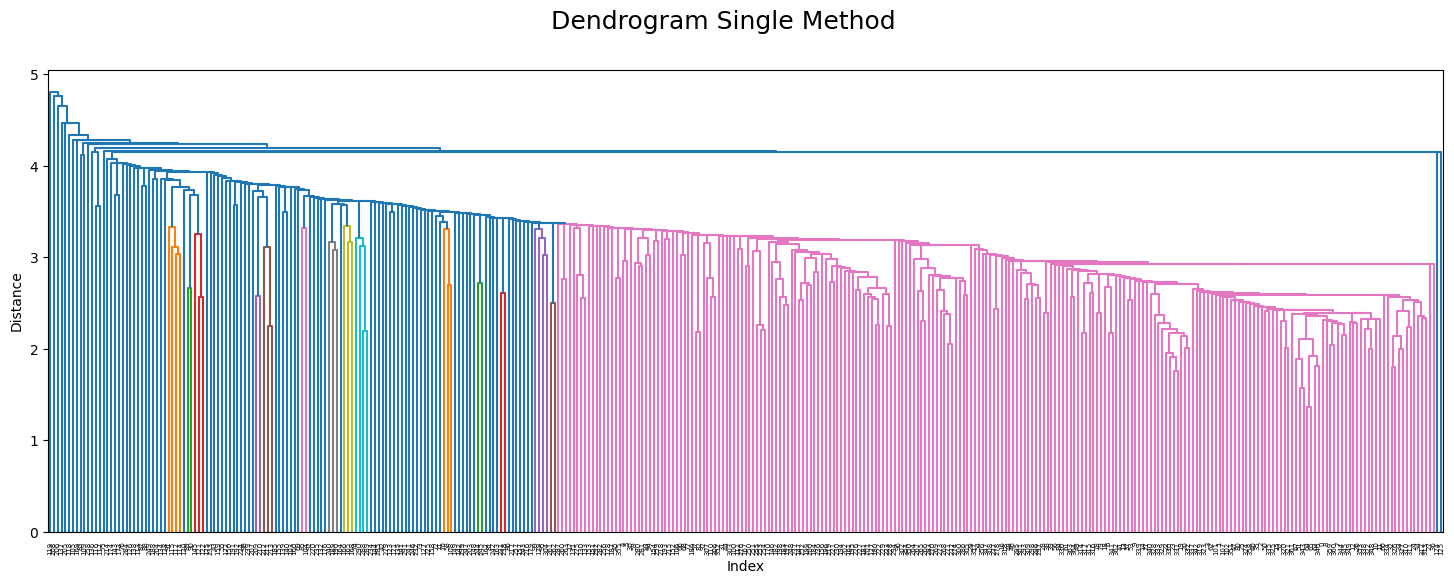

In [24]:
distance_single = linkage(data_1999_final.loc[:,['BASEL_temp_mean','BASEL_sunshine',
 'BELGRADE_temp_mean', 'BELGRADE_sunshine',
 'BUDAPEST_temp_mean', 'BUDAPEST_sunshine',
 'DEBILT_temp_mean', 'DEBILT_sunshine',
 'DUSSELDORF_temp_mean', 'DUSSELDORF_sunshine',
 
 'HEATHROW_temp_mean', 'HEATHROW_sunshine',
 'KASSEL_temp_mean', 'KASSEL_sunshine',
 'LJUBLJANA_temp_mean', 'LJUBLJANA_sunshine',
 'MAASTRICHT_temp_mean', 'MAASTRICHT_sunshine',
 'MADRID_temp_mean', 'MADRID_sunshine',
 'MUNCHENB_temp_mean', 'MUNCHENB_sunshine',
 'OSLO_temp_mean', 'OSLO_sunshine',
 'ROMA_temp_mean', 'ROMA_sunshine',
 'SONNBLICK_temp_mean', 'SONNBLICK_sunshine',
 'STOCKHOLM_temp_mean', 'STOCKHOLM_sunshine',
 
 'VALENTIA_temp_mean', 'VALENTIA_sunshine']],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

## Running an average method dendogram

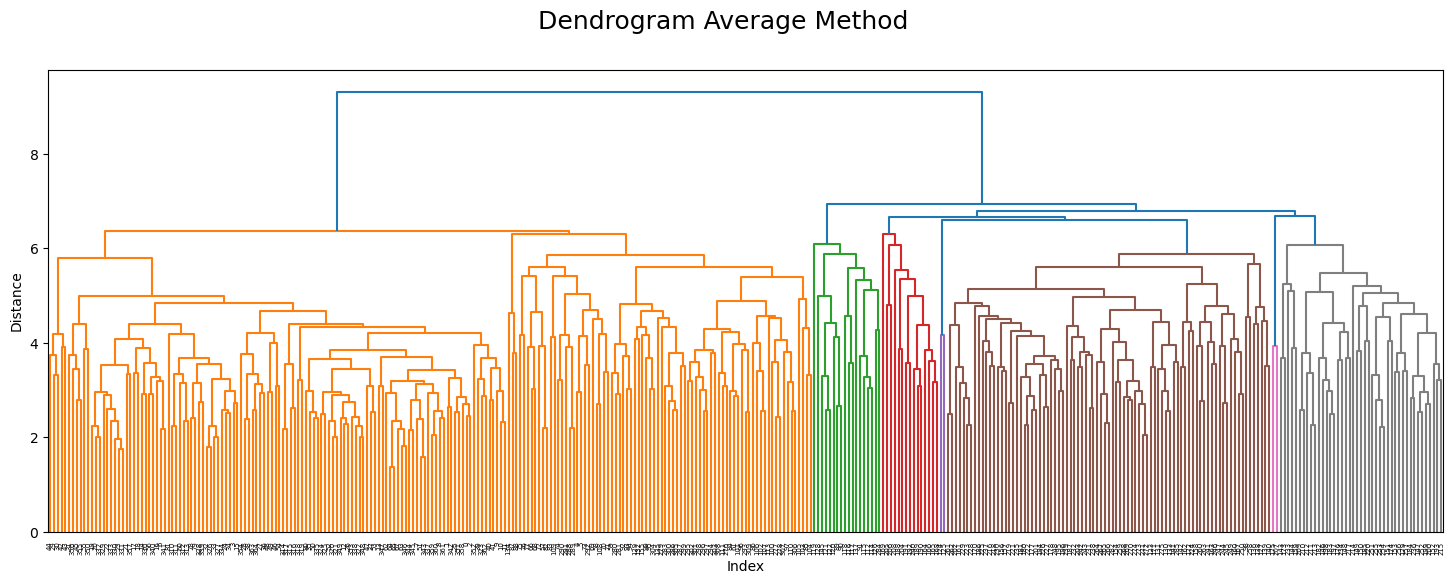

In [25]:
distance_average = linkage(data_1999_final.loc[:,['BASEL_temp_mean','BASEL_sunshine',
 'BELGRADE_temp_mean', 'BELGRADE_sunshine',
 'BUDAPEST_temp_mean', 'BUDAPEST_sunshine',
 'DEBILT_temp_mean', 'DEBILT_sunshine',
 'DUSSELDORF_temp_mean', 'DUSSELDORF_sunshine',
 
 'HEATHROW_temp_mean', 'HEATHROW_sunshine',
 'KASSEL_temp_mean', 'KASSEL_sunshine',
 'LJUBLJANA_temp_mean', 'LJUBLJANA_sunshine',
 'MAASTRICHT_temp_mean', 'MAASTRICHT_sunshine',
 'MADRID_temp_mean', 'MADRID_sunshine',
 'MUNCHENB_temp_mean', 'MUNCHENB_sunshine',
 'OSLO_temp_mean', 'OSLO_sunshine',
 'ROMA_temp_mean', 'ROMA_sunshine',
 'SONNBLICK_temp_mean', 'SONNBLICK_sunshine',
 'STOCKHOLM_temp_mean', 'STOCKHOLM_sunshine',
 
 'VALENTIA_temp_mean', 'VALENTIA_sunshine']],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

## Running a complete method dendogram

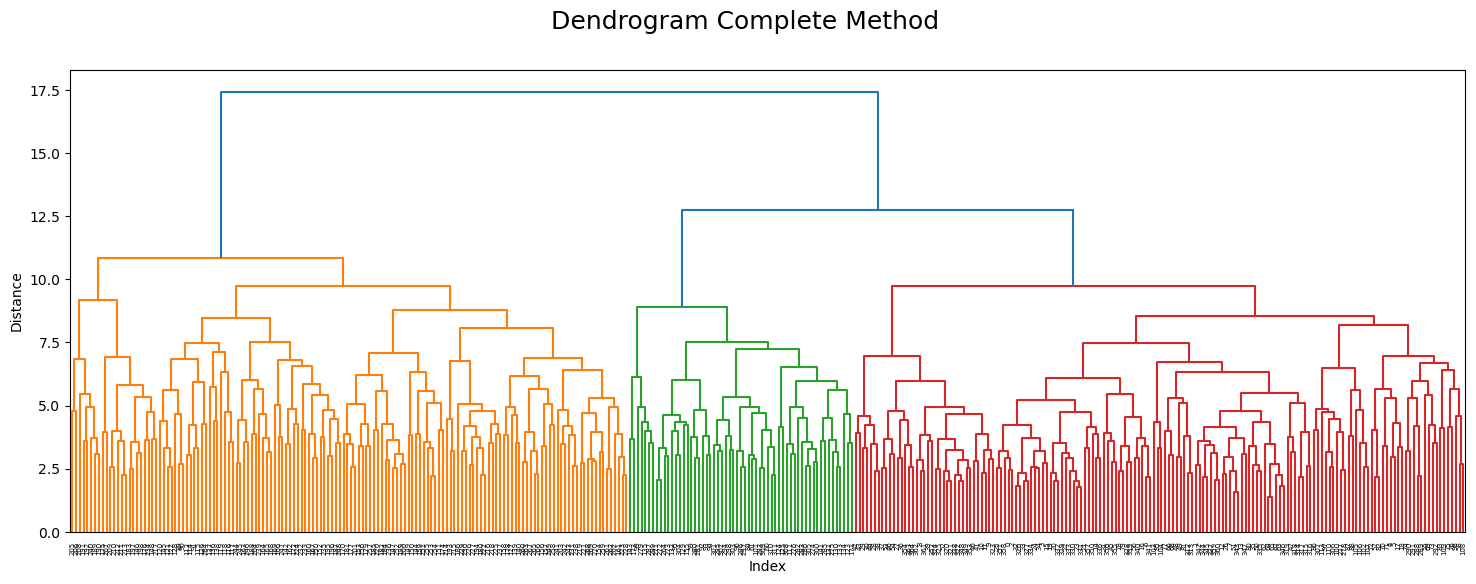

In [26]:
distance_complete = linkage(data_1999_final.loc[:,['BASEL_temp_mean','BASEL_sunshine',
 'BELGRADE_temp_mean', 'BELGRADE_sunshine',
 'BUDAPEST_temp_mean', 'BUDAPEST_sunshine',
 'DEBILT_temp_mean', 'DEBILT_sunshine',
 'DUSSELDORF_temp_mean', 'DUSSELDORF_sunshine',
 
 'HEATHROW_temp_mean', 'HEATHROW_sunshine',
 'KASSEL_temp_mean', 'KASSEL_sunshine',
 'LJUBLJANA_temp_mean', 'LJUBLJANA_sunshine',
 'MAASTRICHT_temp_mean', 'MAASTRICHT_sunshine',
 'MADRID_temp_mean', 'MADRID_sunshine',
 'MUNCHENB_temp_mean', 'MUNCHENB_sunshine',
 'OSLO_temp_mean', 'OSLO_sunshine',
 'ROMA_temp_mean', 'ROMA_sunshine',
 'SONNBLICK_temp_mean', 'SONNBLICK_sunshine',
 'STOCKHOLM_temp_mean', 'STOCKHOLM_sunshine',
 
 'VALENTIA_temp_mean', 'VALENTIA_sunshine']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

## Running the ward method dendogram

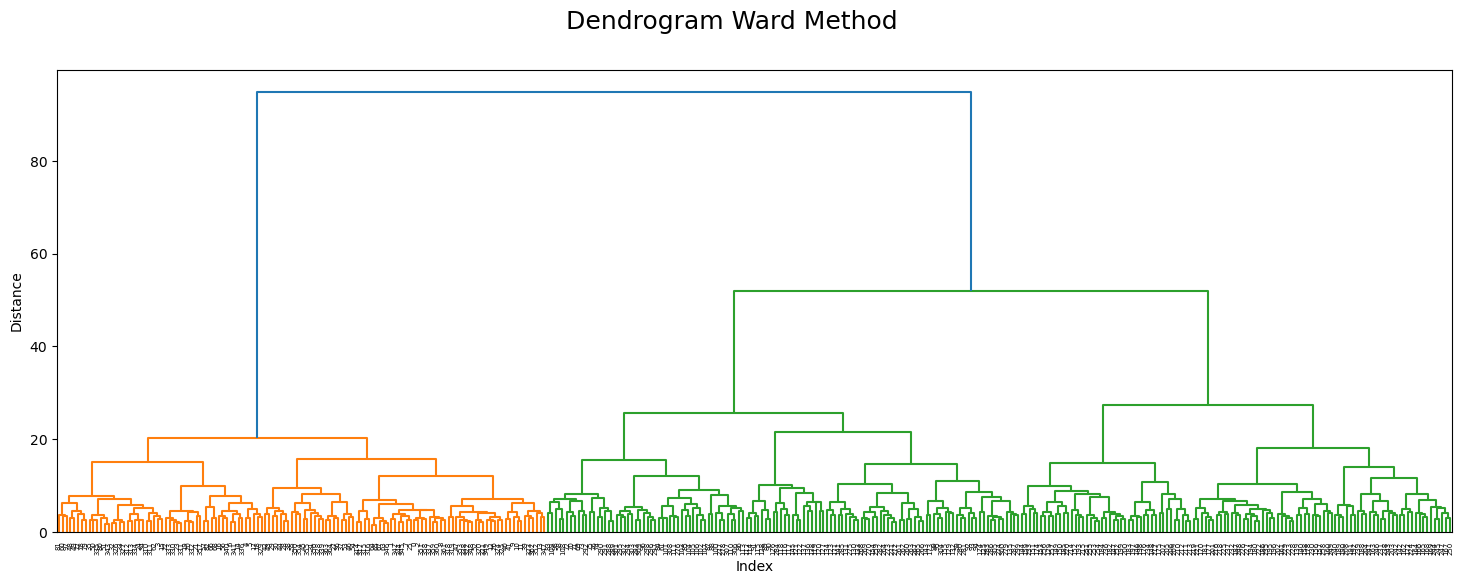

In [27]:
distance_ward = linkage(data_1999_final.loc[:,['BASEL_temp_mean','BASEL_sunshine',
 'BELGRADE_temp_mean', 'BELGRADE_sunshine',
 'BUDAPEST_temp_mean', 'BUDAPEST_sunshine',
 'DEBILT_temp_mean', 'DEBILT_sunshine',
 'DUSSELDORF_temp_mean', 'DUSSELDORF_sunshine',
 
 'HEATHROW_temp_mean', 'HEATHROW_sunshine',
 'KASSEL_temp_mean', 'KASSEL_sunshine',
 'LJUBLJANA_temp_mean', 'LJUBLJANA_sunshine',
 'MAASTRICHT_temp_mean', 'MAASTRICHT_sunshine',
 'MADRID_temp_mean', 'MADRID_sunshine',
 'MUNCHENB_temp_mean', 'MUNCHENB_sunshine',
 'OSLO_temp_mean', 'OSLO_sunshine',
 'ROMA_temp_mean', 'ROMA_sunshine',
 'SONNBLICK_temp_mean', 'SONNBLICK_sunshine',
 'STOCKHOLM_temp_mean', 'STOCKHOLM_sunshine',
 
 'VALENTIA_temp_mean', 'VALENTIA_sunshine']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## Importing the answers dataframe

In [28]:
path1=r"C:\Users\Sam\Desktop\CF\Machine Learning\Part 1\ClimateWins\DataSets\Supervised\answers.csv"
da=pd.read_csv(os.path.join(path1))

In [29]:
da.head()

,Unnamed: 0,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Principal Component Analysis

In [30]:
# scaling the data to use
data_1999_final.head()

,BASEL_temp_mean,BASEL_sunshine,BELGRADE_temp_mean,BELGRADE_sunshine,BUDAPEST_temp_mean,BUDAPEST_sunshine,DEBILT_temp_mean,DEBILT_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_sunshine,...,OSLO_temp_mean,OSLO_sunshine,ROMA_temp_mean,ROMA_sunshine,SONNBLICK_temp_mean,SONNBLICK_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_sunshine,VALENTIA_temp_mean,VALENTIA_sunshine
0,-1.471097,-1.013004,-1.457203,-0.732771,-1.741057,-1.261007,-0.849693,-0.693494,-0.868288,-0.987914,...,-0.836601,-1.019388,-0.619275,-0.917258,-0.786616,-0.981993,-0.926793,-1.016662,-0.960341,-0.951691
1,-1.126483,-0.434258,-1.022498,-0.122593,-1.517045,-1.261007,-0.750518,-1.162154,-0.778094,-1.059897,...,-0.811123,-1.019388,-0.619275,-1.795563,-0.602876,0.501620,-0.855200,-1.016662,-0.960341,-0.746668
2,-0.437254,-0.916546,-1.045996,-1.207353,-1.033652,-0.950467,-0.882751,-1.162154,-0.823191,-1.035903,...,-0.581817,-1.019388,-0.985177,-0.313423,-0.701813,-0.981993,-0.712013,-1.016662,-0.619502,-0.951691
3,-0.244270,-1.061233,-1.304469,-1.229953,-0.915751,-0.042736,-0.138936,-1.162154,-0.131707,-1.059897,...,-0.645513,-1.019388,-1.046160,0.317859,-0.475672,-0.981993,-0.735877,-1.016662,-0.363873,-0.951691
4,-0.175347,0.409747,-0.940257,0.148597,-1.104392,-1.261007,0.092473,-0.224835,0.123841,-0.196097,...,-0.823862,-0.373499,-0.969931,0.290412,0.231021,-0.779682,-0.664284,-1.016662,-0.761518,-0.951691


In [31]:
d1999.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=170)

In [32]:
# to display all columns
for column in d1999.columns:
    print(column)

DATE
MONTH
BASEL_cloud_cover
BASEL_wind_speed
BASEL_humidity
BASEL_pressure
BASEL_global_radiation
BASEL_precipitation
BASEL_snow_depth
BASEL_sunshine
BASEL_temp_mean
BASEL_temp_min
BASEL_temp_max
BELGRADE_cloud_cover
BELGRADE_humidity
BELGRADE_pressure
BELGRADE_global_radiation
BELGRADE_precipitation
BELGRADE_sunshine
BELGRADE_temp_mean
BELGRADE_temp_min
BELGRADE_temp_max
BUDAPEST_cloud_cover
BUDAPEST_humidity
BUDAPEST_pressure
BUDAPEST_global_radiation
BUDAPEST_precipitation
BUDAPEST_sunshine
BUDAPEST_temp_mean
BUDAPEST_temp_min
BUDAPEST_temp_max
DEBILT_cloud_cover
DEBILT_wind_speed
DEBILT_humidity
DEBILT_pressure
DEBILT_global_radiation
DEBILT_precipitation
DEBILT_sunshine
DEBILT_temp_mean
DEBILT_temp_min
DEBILT_temp_max
DUSSELDORF_cloud_cover
DUSSELDORF_wind_speed
DUSSELDORF_humidity
DUSSELDORF_pressure
DUSSELDORF_global_radiation
DUSSELDORF_precipitation
DUSSELDORF_snow_depth
DUSSELDORF_sunshine
DUSSELDORF_temp_mean
DUSSELDORF_temp_min
DUSSELDORF_temp_max
GDANSK_cloud_cover
GDANSK

In [33]:
# scaling
features = d1999[['BASEL_cloud_cover',
'BASEL_wind_speed',
'BASEL_humidity',
'BASEL_pressure',
'BASEL_global_radiation',
'BASEL_precipitation',
'BASEL_snow_depth',
'BASEL_sunshine',
'BASEL_temp_mean',
'BASEL_temp_min',
'BASEL_temp_max',
'BELGRADE_cloud_cover',
'BELGRADE_humidity',
'BELGRADE_pressure',
'BELGRADE_global_radiation',
'BELGRADE_precipitation',
'BELGRADE_sunshine',
'BELGRADE_temp_mean',
'BELGRADE_temp_min',
'BELGRADE_temp_max',
'BUDAPEST_cloud_cover',
'BUDAPEST_humidity',
'BUDAPEST_pressure',
'BUDAPEST_global_radiation',
'BUDAPEST_precipitation',
'BUDAPEST_sunshine',
'BUDAPEST_temp_mean',
'BUDAPEST_temp_min',
'BUDAPEST_temp_max',
'DEBILT_cloud_cover',
'DEBILT_wind_speed',
'DEBILT_humidity',
'DEBILT_pressure',
'DEBILT_global_radiation',
'DEBILT_precipitation',
'DEBILT_sunshine',
'DEBILT_temp_mean',
'DEBILT_temp_min',
'DEBILT_temp_max',
'DUSSELDORF_cloud_cover',
'DUSSELDORF_wind_speed',
'DUSSELDORF_humidity',
'DUSSELDORF_pressure',
'DUSSELDORF_global_radiation',
'DUSSELDORF_precipitation',
'DUSSELDORF_snow_depth',
'DUSSELDORF_sunshine',
'DUSSELDORF_temp_mean',
'DUSSELDORF_temp_min',
'DUSSELDORF_temp_max',
'GDANSK_cloud_cover',
'GDANSK_humidity',
'GDANSK_precipitation',
'GDANSK_snow_depth',
'GDANSK_temp_mean',
'GDANSK_temp_min',
'GDANSK_temp_max',
'HEATHROW_cloud_cover',
'HEATHROW_humidity',
'HEATHROW_pressure',
'HEATHROW_global_radiation',
'HEATHROW_precipitation',
'HEATHROW_snow_depth',
'HEATHROW_sunshine',
'HEATHROW_temp_mean',
'HEATHROW_temp_min',
'HEATHROW_temp_max',
'KASSEL_wind_speed',
'KASSEL_humidity',
'KASSEL_pressure',
'KASSEL_global_radiation',
'KASSEL_precipitation',
'KASSEL_sunshine',
'KASSEL_temp_mean',
'KASSEL_temp_min',
'KASSEL_temp_max',
'LJUBLJANA_cloud_cover',
'LJUBLJANA_wind_speed',
'LJUBLJANA_humidity',
'LJUBLJANA_pressure',
'LJUBLJANA_global_radiation',
'LJUBLJANA_precipitation',
'LJUBLJANA_sunshine',
'LJUBLJANA_temp_mean',
'LJUBLJANA_temp_min',
'LJUBLJANA_temp_max',
'MAASTRICHT_cloud_cover',
'MAASTRICHT_wind_speed',
'MAASTRICHT_humidity',
'MAASTRICHT_pressure',
'MAASTRICHT_global_radiation',
'MAASTRICHT_precipitation',
'MAASTRICHT_sunshine',
'MAASTRICHT_temp_mean',
'MAASTRICHT_temp_min',
'MAASTRICHT_temp_max',
'MADRID_cloud_cover',
'MADRID_wind_speed',
'MADRID_humidity',
'MADRID_pressure',
'MADRID_global_radiation',
'MADRID_precipitation',
'MADRID_sunshine',
'MADRID_temp_mean',
'MADRID_temp_min',
'MADRID_temp_max',
'MUNCHENB_cloud_cover',
'MUNCHENB_humidity',
'MUNCHENB_global_radiation',
'MUNCHENB_precipitation',
'MUNCHENB_snow_depth',
'MUNCHENB_sunshine',
'MUNCHENB_temp_mean',
'MUNCHENB_temp_min',
'MUNCHENB_temp_max',
'OSLO_cloud_cover',
'OSLO_wind_speed',
'OSLO_humidity',
'OSLO_pressure',
'OSLO_global_radiation',
'OSLO_precipitation',
'OSLO_snow_depth',
'OSLO_sunshine',
'OSLO_temp_mean',
'OSLO_temp_min',
'OSLO_temp_max',
'ROMA_cloud_cover',
'ROMA_wind_speed',
'ROMA_humidity',
'ROMA_pressure',
'ROMA_sunshine',
'ROMA_temp_mean',
'SONNBLICK_cloud_cover',
'SONNBLICK_wind_speed',
'SONNBLICK_humidity',
'SONNBLICK_pressure',
'SONNBLICK_global_radiation',
'SONNBLICK_precipitation',
'SONNBLICK_sunshine',
'SONNBLICK_temp_mean',
'SONNBLICK_temp_min',
'SONNBLICK_temp_max',
'STOCKHOLM_cloud_cover',
'STOCKHOLM_pressure',
'STOCKHOLM_global_radiation',
'STOCKHOLM_precipitation',
'STOCKHOLM_sunshine',
'STOCKHOLM_temp_mean',
'STOCKHOLM_temp_min',
'STOCKHOLM_temp_max',
'TOURS_wind_speed',
'TOURS_humidity',
'TOURS_pressure',
'TOURS_global_radiation',
'TOURS_precipitation',
'TOURS_temp_mean',
'TOURS_temp_min',
'TOURS_temp_max',
'VALENTIA_cloud_cover',
'VALENTIA_humidity',
'VALENTIA_pressure',
'VALENTIA_global_radiation',
'VALENTIA_precipitation',
'VALENTIA_snow_depth',
'VALENTIA_sunshine',
'VALENTIA_temp_mean',
'VALENTIA_temp_min',
'VALENTIA_temp_max']]
scaled_features = StandardScaler().fit_transform(features)

In [34]:
# checking for execution
scaled_features

array([[ 1.45762234e-01, -4.44089210e-16,  2.07940865e+00, ...,
        -9.60340764e-01, -8.41689717e-01, -9.42480345e-01],
       [-3.12886175e-01, -4.44089210e-16,  6.48590187e-01, ...,
        -9.60340764e-01, -8.67778095e-01, -1.30237647e+00],
       [ 6.04410643e-01, -4.44089210e-16, -9.12302680e-01, ...,
        -6.19501890e-01, -8.15601338e-01, -3.05741049e-01],
       ...,
       [ 1.06305905e+00, -4.44089210e-16,  1.03881340e+00, ...,
        -1.18756668e+00, -1.18083864e+00, -1.30237647e+00],
       [ 6.04410643e-01, -4.44089210e-16,  5.18515781e-01, ...,
        -8.18324567e-01, -8.41689717e-01, -7.21005807e-01],
       [ 6.04410643e-01, -4.44089210e-16,  1.29896221e+00, ...,
        -5.34292171e-01, -3.19922144e-01, -6.93321490e-01]])

In [35]:
# running the PCA model, reducing to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)

In [36]:
# checking for execution
principalComponents

array([[-9.25546137e+00, -6.87305042e-01],
       [-9.51598248e+00,  2.11631117e+00],
       [-9.08328060e+00,  3.71550358e+00],
       [-8.31261621e+00,  2.53301340e+00],
       [-5.04791067e+00, -1.31348896e+00],
       [-4.85183556e+00, -1.36728913e+00],
       [-7.50104900e+00,  2.53315702e+00],
       [-9.31900765e+00,  4.48501912e+00],
       [-1.02296555e+01,  1.75161563e+00],
       [-1.12799345e+01, -3.56651816e-01],
       [-1.25820122e+01,  1.02257962e+00],
       [-1.28317901e+01,  1.21619062e+00],
       [-1.29879613e+01,  2.70698903e+00],
       [-1.05337347e+01,  2.00474632e+00],
       [-9.02895389e+00,  1.08198187e+00],
       [-8.41338473e+00,  3.60742752e+00],
       [-7.03019156e+00, -3.96473970e-01],
       [-6.67198038e+00, -3.72297183e+00],
       [-7.55735179e+00, -2.31540484e+00],
       [-7.21274095e+00, -3.88848625e+00],
       [-8.37154350e+00, -4.94844606e+00],
       [-9.80752362e+00, -5.69300421e+00],
       [-1.00778365e+01, -4.28337598e+00],
       [-9.

In [37]:
# making a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])

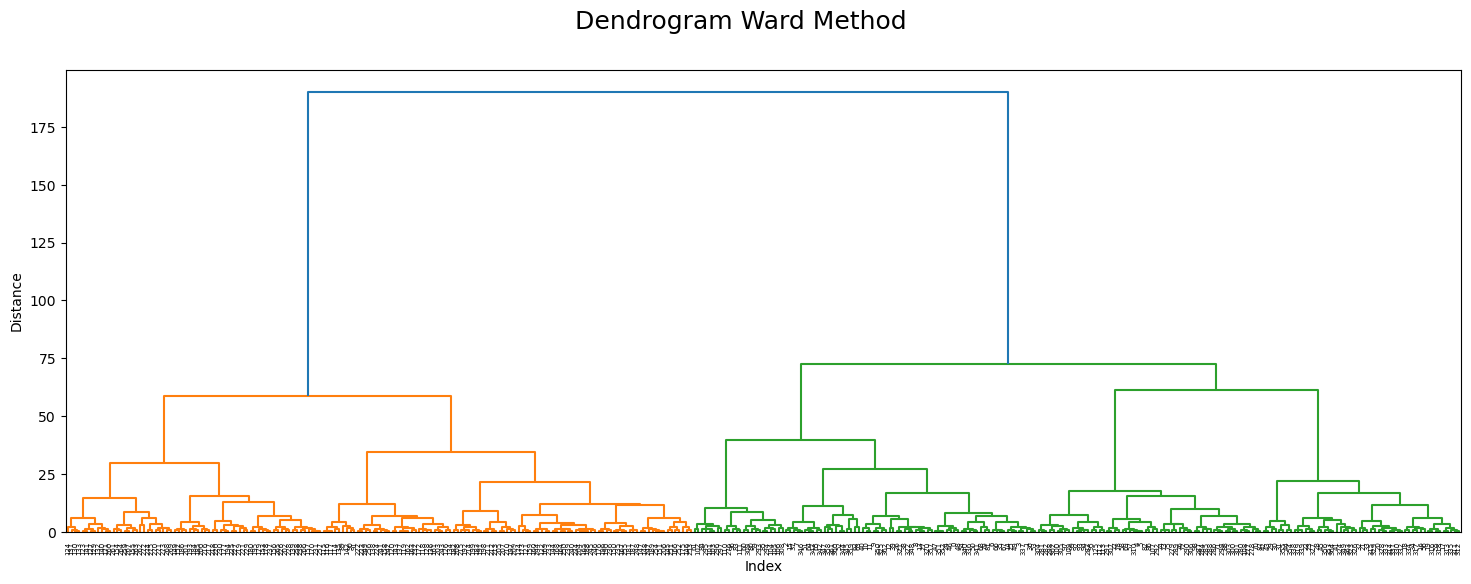

In [38]:
distance_ward = linkage(dfPCA, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

<Axes: title={'center': 'labels'}, xlabel='PCA1', ylabel='PCA2'>

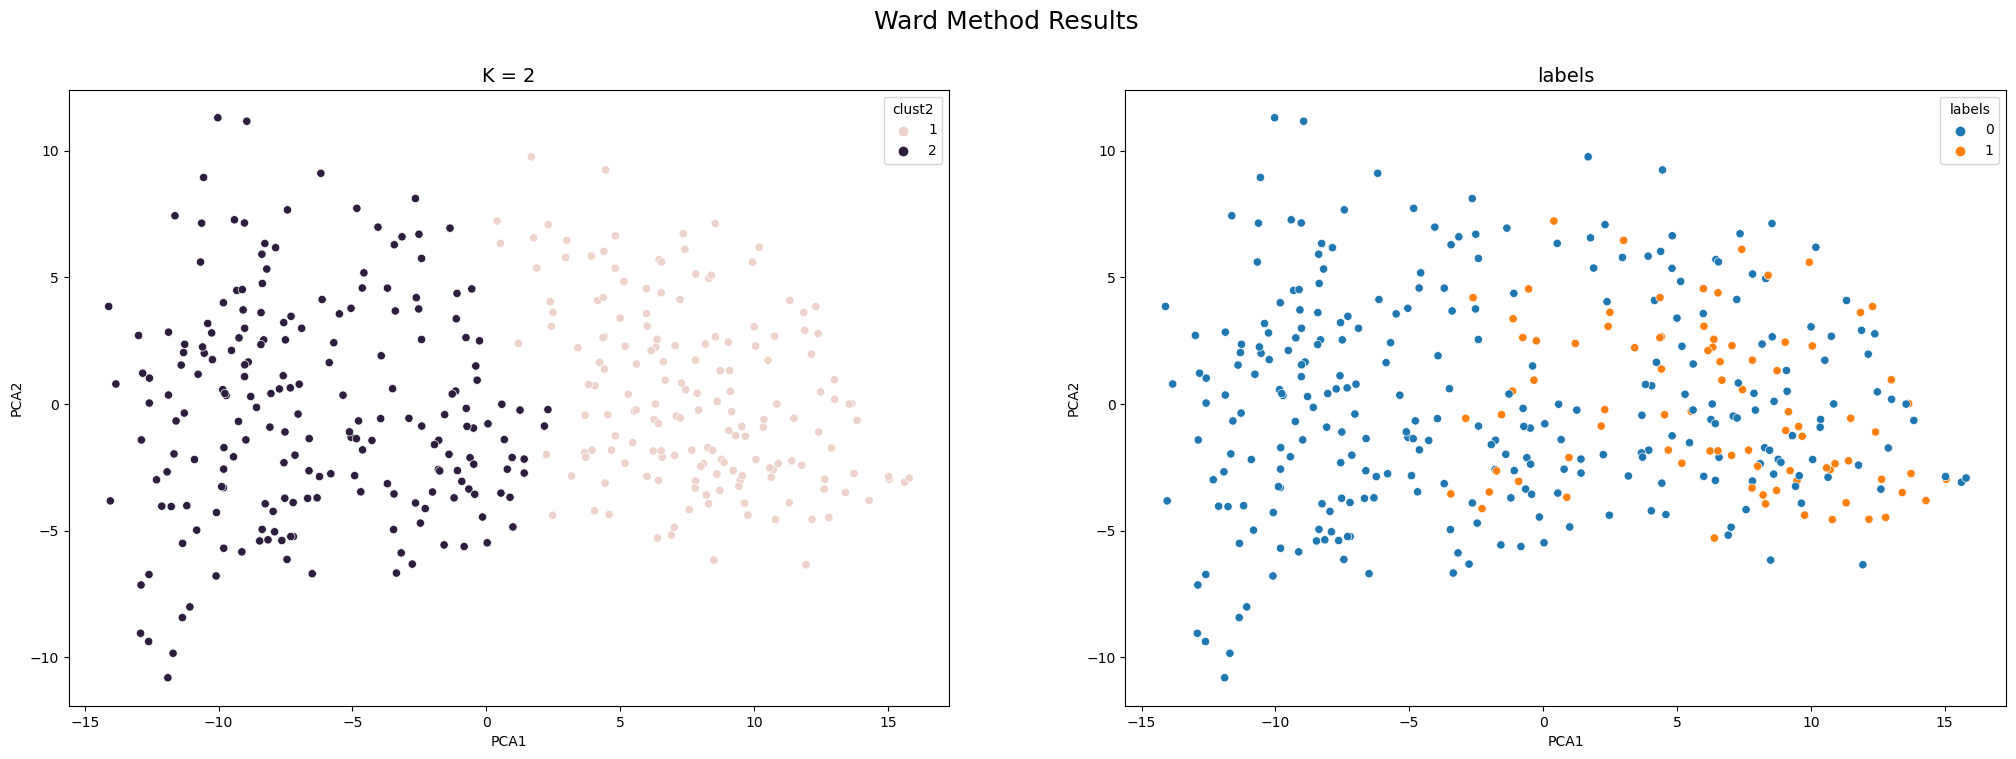

In [39]:
data_1999_final_WM=dfPCA

data_1999_final_WM['clust2']=fcluster(distance_ward,2, criterion='maxclust')
data_1999_final_WM['labels']=da['BASEL_pleasant_weather']
data_1999_final_WM.head()

#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Ward Method Results",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=data_1999_final_WM, hue="clust2")

plt.subplot(1,2,2)
plt.title("labels",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=data_1999_final_WM, hue="labels")

<Axes: title={'center': 'labels'}, xlabel='PCA1', ylabel='PCA2'>

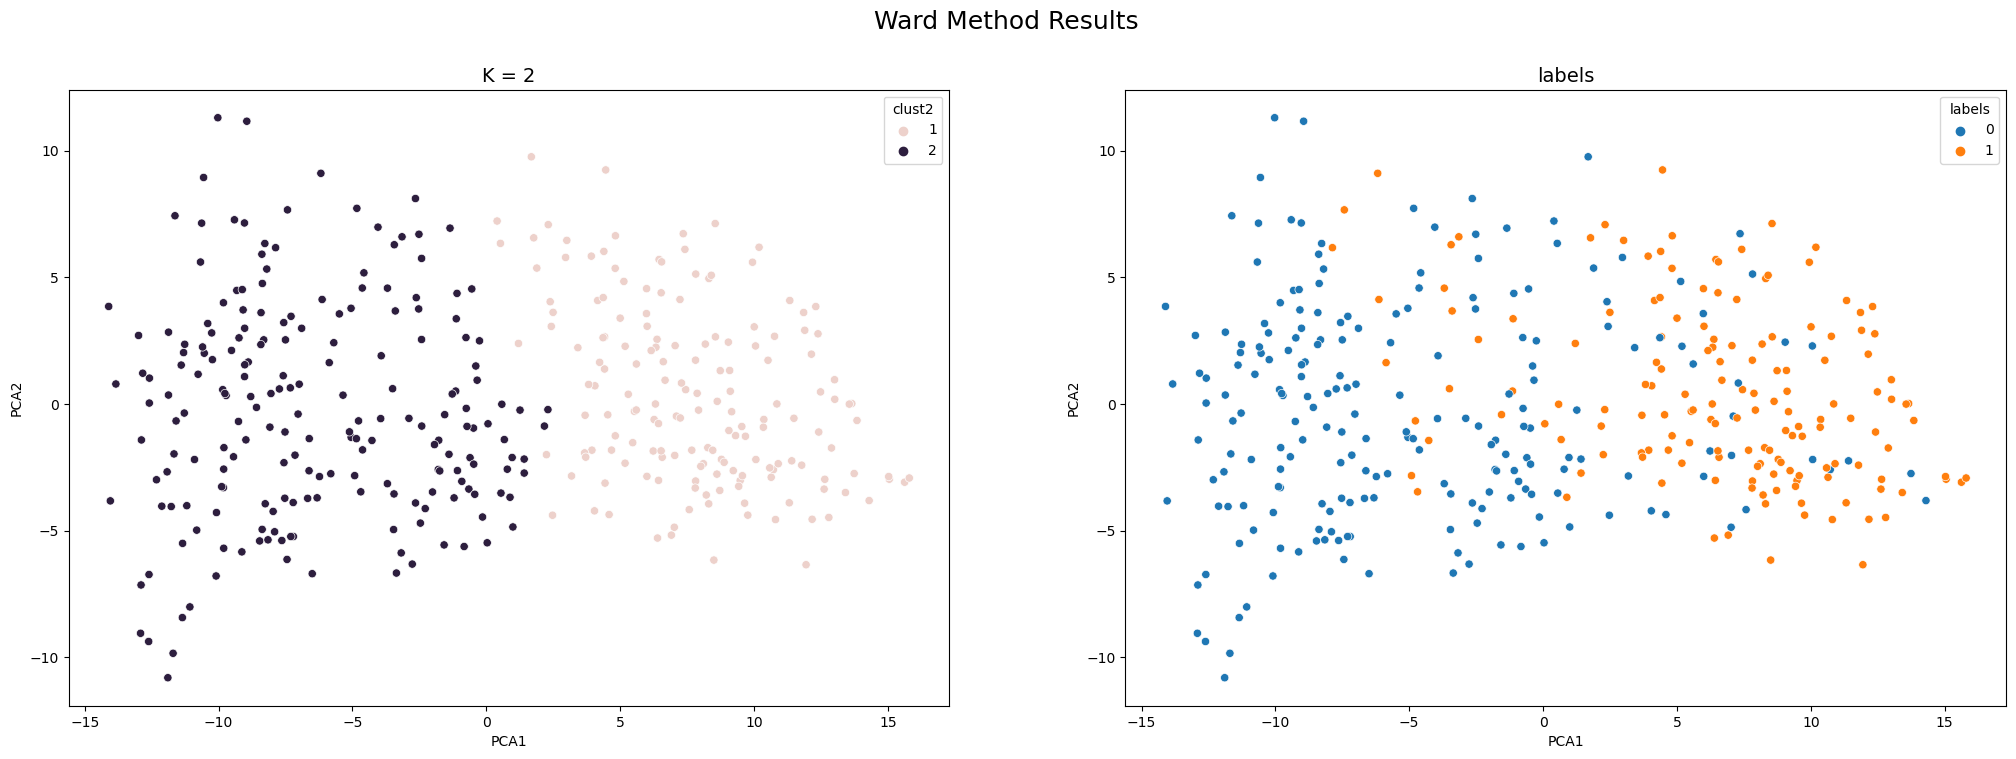

In [40]:
data_1999_final_WM=dfPCA

data_1999_final_WM['clust2']=fcluster(distance_ward,2, criterion='maxclust')
data_1999_final_WM['labels']=da['MADRID_pleasant_weather']
data_1999_final_WM.head()

#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Ward Method Results",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=data_1999_final_WM, hue="clust2")

plt.subplot(1,2,2)
plt.title("labels",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=data_1999_final_WM, hue="labels")

<Axes: title={'center': 'labels'}, xlabel='PCA1', ylabel='PCA2'>

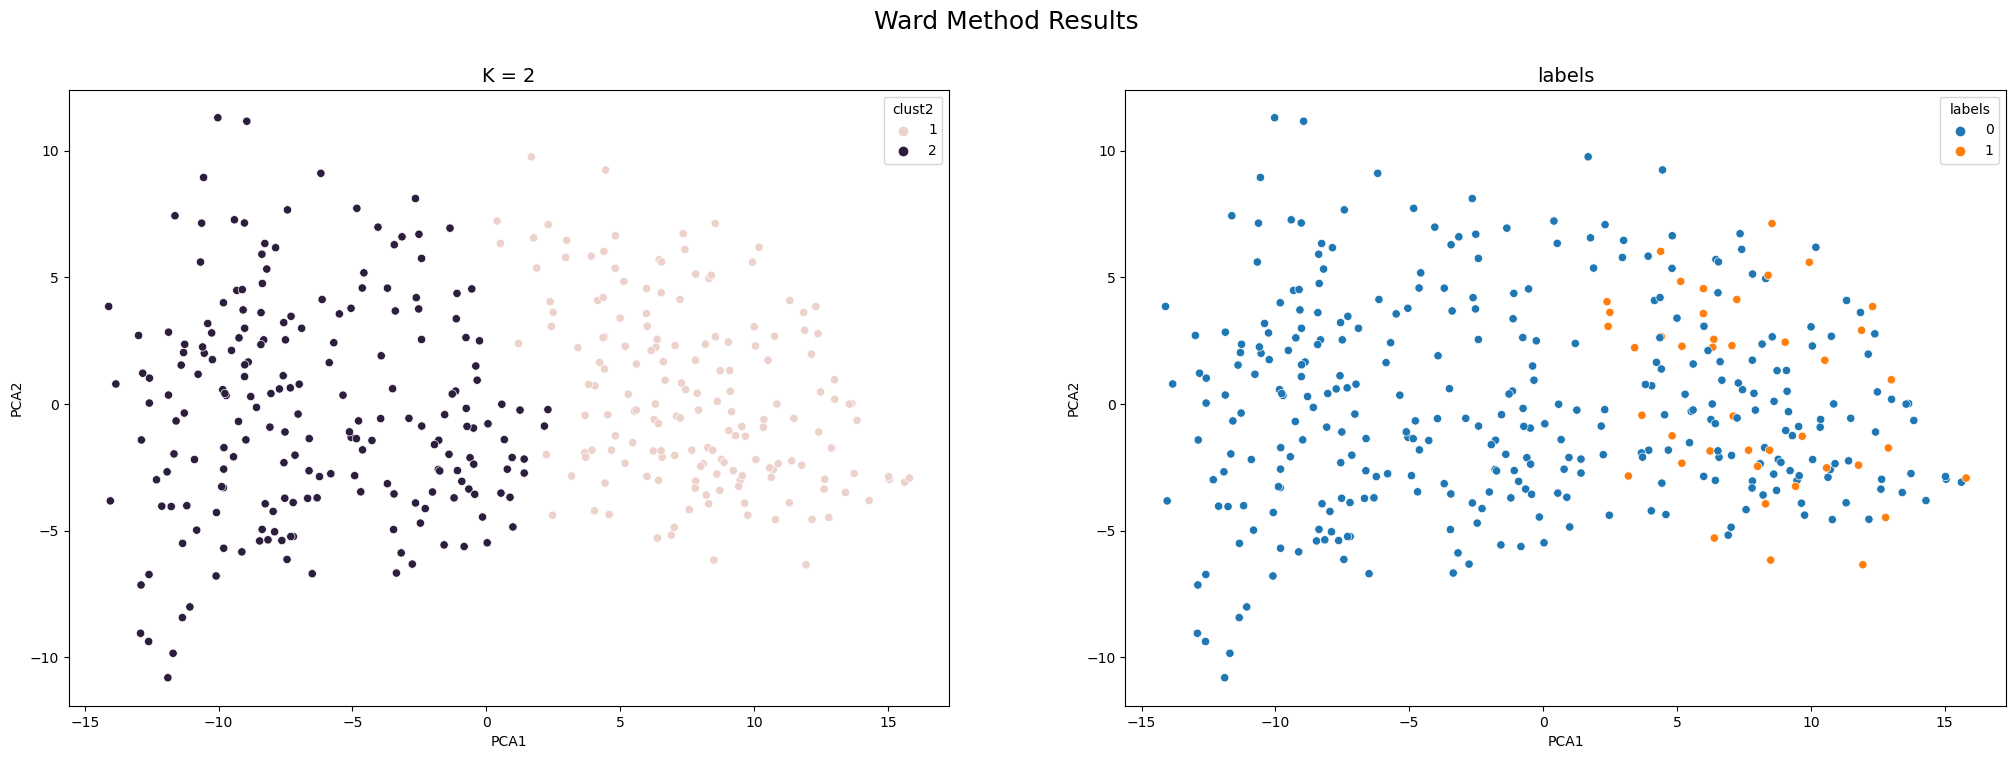

In [42]:
data_1999_final_WM=dfPCA

data_1999_final_WM['clust2']=fcluster(distance_ward,2, criterion='maxclust')
data_1999_final_WM['labels']=da['OSLO_pleasant_weather']
data_1999_final_WM.head()

#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Ward Method Results",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=data_1999_final_WM, hue="clust2")

plt.subplot(1,2,2)
plt.title("labels",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=data_1999_final_WM, hue="labels")